In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import json

This code takes a csv of observed points and a csv make from a .shp shapefiles. 
it will plot them together and make a json file compatible with Plouf C code. 

In [2]:
def plot_line_and_polygon(shape: pd.DataFrame, points: pd.DataFrame = None) -> None:
    fig, ax = plt.subplots(figsize=(9,13))

    if points is not None:
        ax.plot(points.Easting,points.Northing,color='red',markersize=3,label='Observed Data')
        
    ax.plot(shape.Easting,shape.Northing,linestyle='dashed',color='black',label='Magnetic Body')
    ax.scatter(shape.Easting,shape.Northing,color='blue',label='Verticies')

    ax.legend(loc='upper right')
    plt.savefig('./shape.png')

In [3]:
def save_json(all_shapes, filename="./data/shape_data.json"):
    """Save the coordinates of multiple shapes to a JSON file."""
    json_data = {"shapes": all_shapes}
    
    # Serializing json
    json_object = json.dumps(json_data, indent=4)
    
    # Writing to a JSON file
    with open(filename, "w") as outfile:
        outfile.write(json_object)

    print('json saved to: {}\n'.format(outfile.name))

In [4]:
pts = pd.read_csv("/home/jovyan/Cproject/data/observed_data/anomaly_a_southwest_line_pts.csv",usecols=[0,1,2],header=None,sep='[\\s,]',names=['Easting','Northing','Mag'],engine='python')
print('\nFile head: \n',pts.head())


File head: 
    Easting  Northing    Mag
0   544340   4052135  50563
1   544340   4052133  50568
2   544339   4052131  50568
3   544339   4052128  50572
4   544339   4052126  50575


In [5]:
shape = pd.read_csv('/home/jovyan/Cproject/data/shape_data/southwest_cone_verticies.csv',usecols=[0,1],sep='[\\s,]',names=['Easting','Northing'],engine='python')
print('\nFile head: \n',shape.head())


File head: 
          Easting      Northing
0  544417.922654  4.051710e+06
1  544486.123287  4.051779e+06
2  544555.839490  4.051837e+06
3  544646.773669  4.051858e+06
4  544699.818606  4.051820e+06


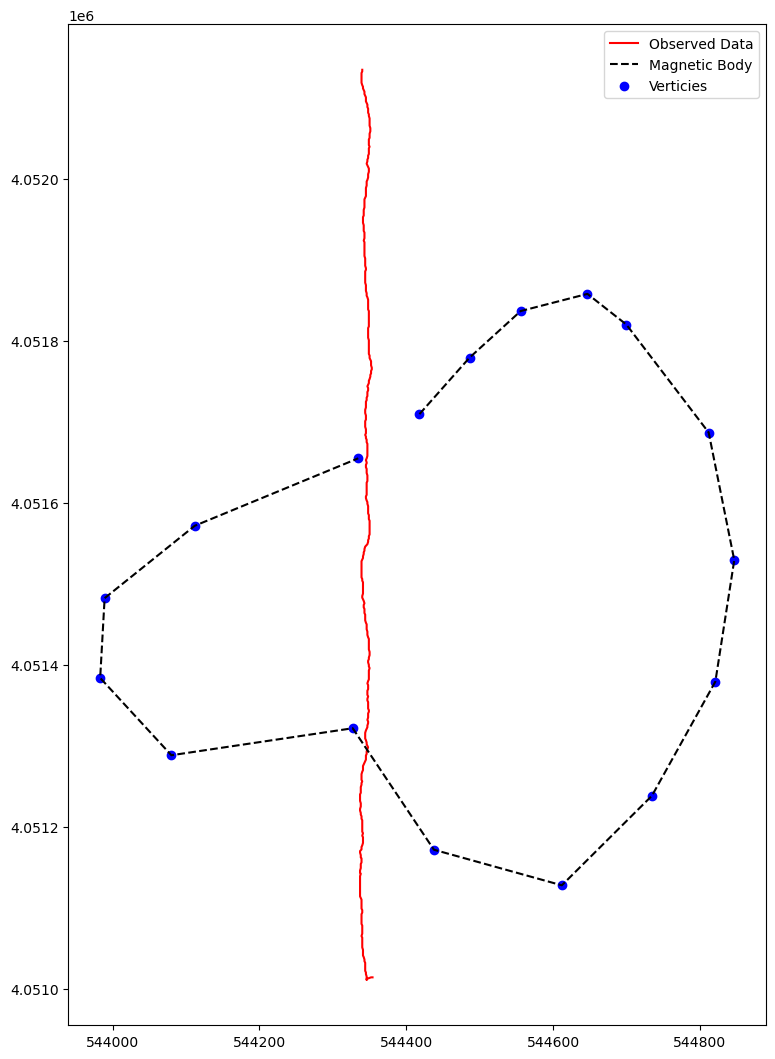

In [6]:
plot_line_and_polygon(shape=shape,points=pts)

In [7]:
all_shapes = []  # List to hold all shape data

#assuming single shape
shape_data = {
    'name': f"shape 1",
    'x': shape.Easting.to_list(),
    'y': shape.Northing.to_list(),
    'magnetic_inclination': 55,
    'magnetic_declination': 0,
    'magnetic_intensity': 20,
    'top': 150,
    'bottom': 210
}

all_shapes.append(shape_data)

# Save all shapes data to JSON
save_json(all_shapes,filename='/home/jovyan/Cproject/data/shape_data/southwest_cone.json')

json saved to: /home/jovyan/Cproject/data/shape_data/southwest_cone.json



In [12]:
all_shapes[0]

{'name': 'shape 1',
 'x': [544366.528924956,
  544475.649938724,
  544518.085888523,
  544706.016523346,
  544869.698043998,
  544887.884879626,
  544942.445386511,
  544942.445386511,
  544857.573486913,
  544803.012980029,
  544621.144623749,
  544475.649938724,
  544124.037783249,
  543905.795755713,
  543790.612463402,
  543790.612463402,
  543851.235248829,
  544093.726390536,
  544318.030696615],
 'y': [4051780.98566507,
  4051938.60490718,
  4052114.41098491,
  4052126.535542,
  4051999.2276926,
  4051793.11022215,
  4051653.67781567,
  4051453.62262376,
  4051229.31831768,
  4051138.38413954,
  4051041.38768286,
  4051029.26312577,
  4051047.4499614,
  4051192.94464643,
  4051326.31477437,
  4051532.43224482,
  4051635.49098004,
  4051665.80237276,
  4051738.54971527],
 'magnetic_inclination': 55,
 'magnetic_declination': 0,
 'magnetic_intensity': 20,
 'top': 150,
 'bottom': 210}